In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from itertools import combinations
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# 1. Combined Cycle Power Plant Data Set

## (a) Download the Combined Cycle Power Plant data

In [2]:
file_path = '../data/CCPP/Folds5x2_pp.xlsx'
df = pd.read_excel(file_path)
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


## (b) Exploring the data:

### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [3]:
rows = df.shape[0]
columns = df.shape[1]
print('Number of rows in dataset: ', rows)
print('Number of columns in dataset: ', columns)
print('Column names: ', df.columns.tolist())

Number of rows in dataset:  9568
Number of columns in dataset:  5
Column names:  ['AT', 'V', 'AP', 'RH', 'PE']


There are 9568 rows and 5 columns. Each row represent hourly ambient observations, and columns represent:

AT: Ambient Temperature 

V: Exhaust Vacuum

AP: Ambient Pressure

RH: Relative Humidity

PE: Net hourly electricalenergy output of the plant (which is predicted using other variables)

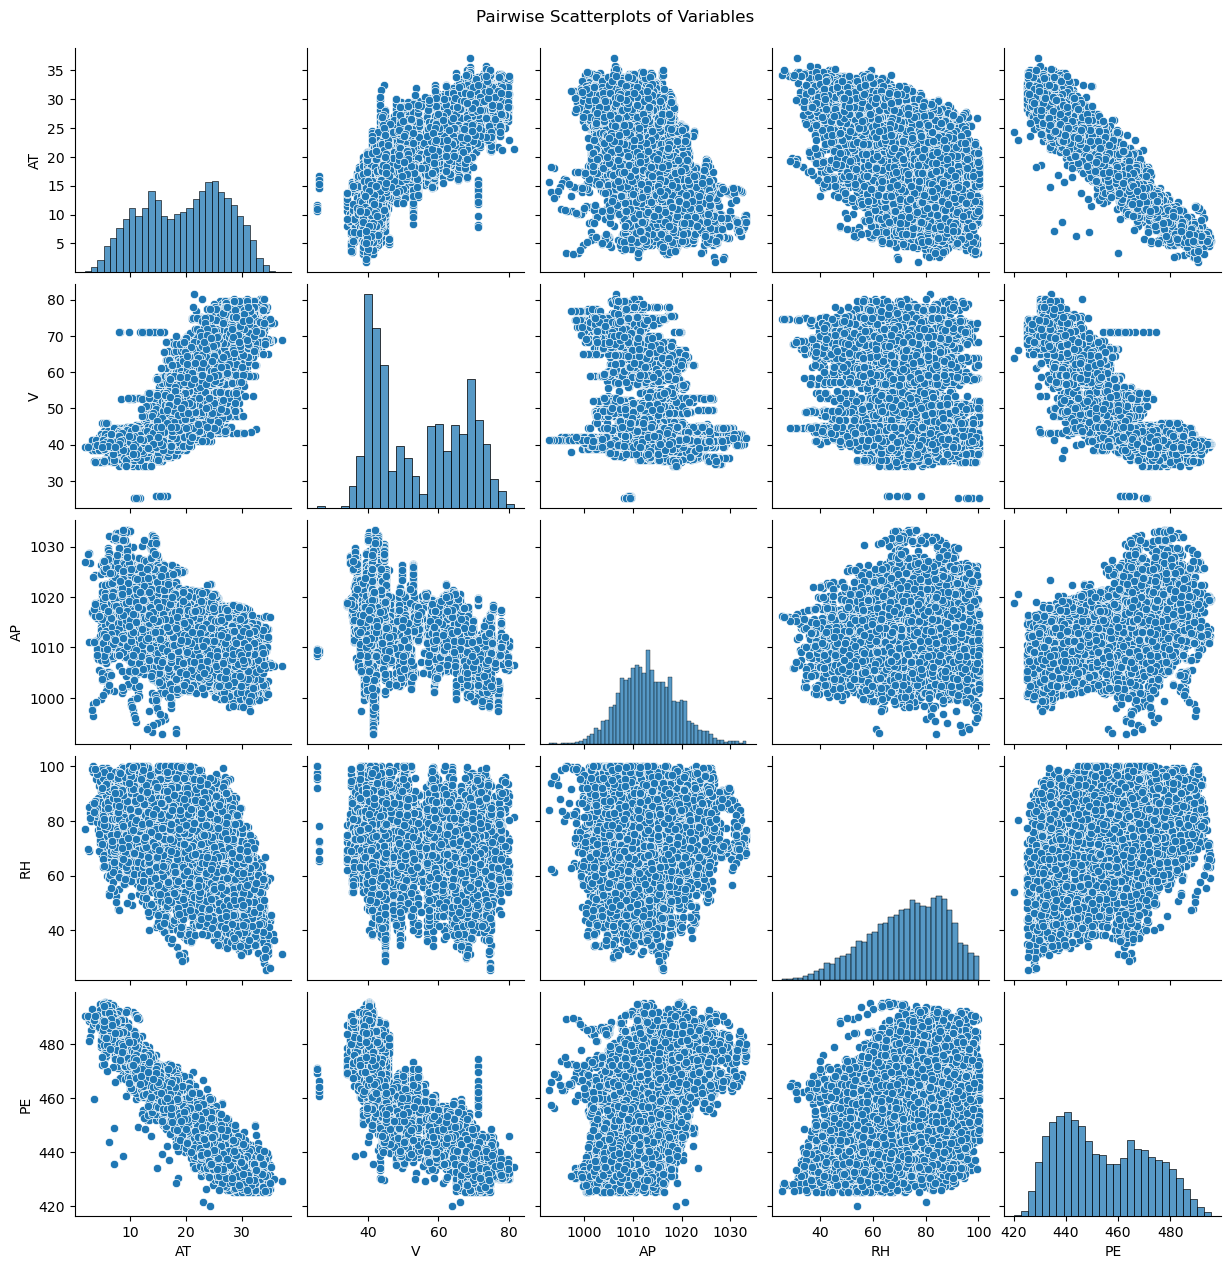

In [4]:
sns.pairplot(df)
plt.suptitle('Pairwise Scatterplots of Variables', y=1.015)
plt.show()

#### Findings from the scatterplots:

- Ambient temperature(AT) shows a positive correlation with Exhaust Vacuum(E)
- Ambient temperature(AT) shows a negative correlation with Electrical Energy Output(PE)
- Exhaust Vacuum(E) shows a negative correlation with Electrical Energy Output(PE)

### iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [5]:
mean = df.mean()
median = df.median()
minimum = df.min()
maximum = df.max()
range_ = maximum - minimum
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

summary_table = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Minimum': minimum,
    'Maximum': maximum,
    'Range': range_,
    'Q1 (25%)': q1,
    'Q3 (75%)': q3,
    'IQR': iqr
})

print("\nStatistics Summary Table:")
summary_table


Statistics Summary Table:


,Mean,Median,Minimum,Maximum,Range,Q1 (25%),Q3 (75%),IQR
AT,19.651231,20.345,1.81,37.11,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,25.36,81.56,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,992.89,1033.30,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,25.56,100.16,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,420.26,495.76,75.50,439.7500,468.43,28.6800


## (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

Simple Linear Regression Model for AT:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:41:30   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

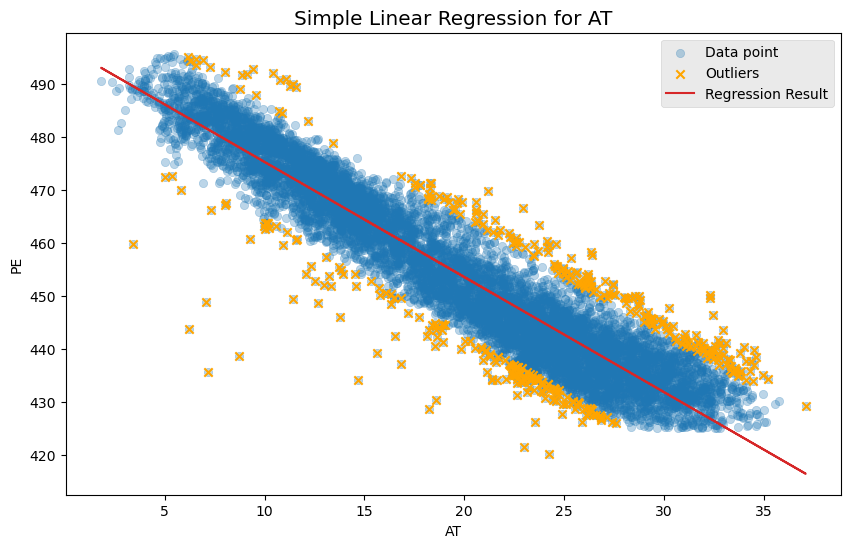

Simple Linear Regression Model for V:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:41:30   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5

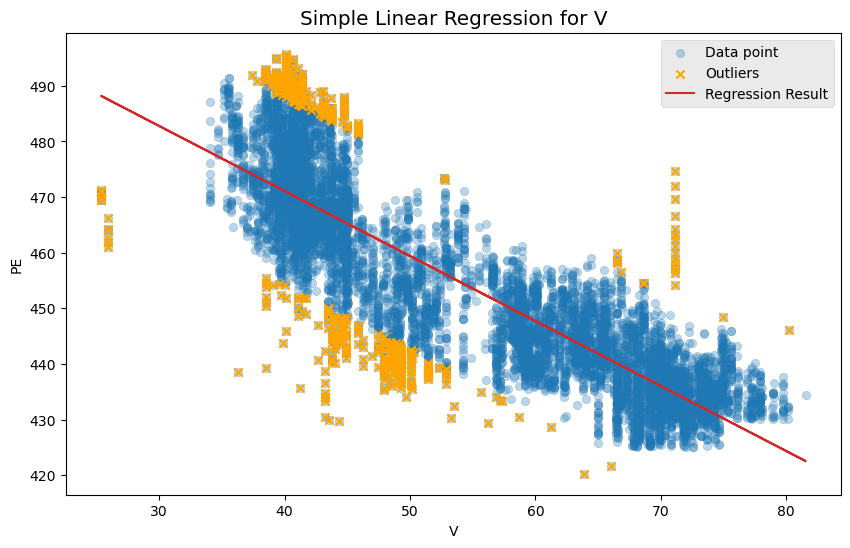

Simple Linear Regression Model for AP:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:41:30   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1

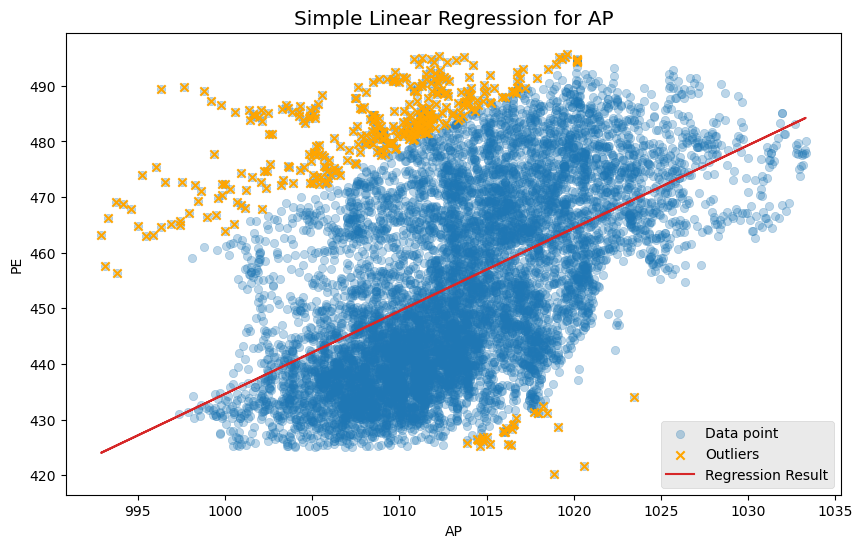

Simple Linear Regression Model for RH:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:41:31   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

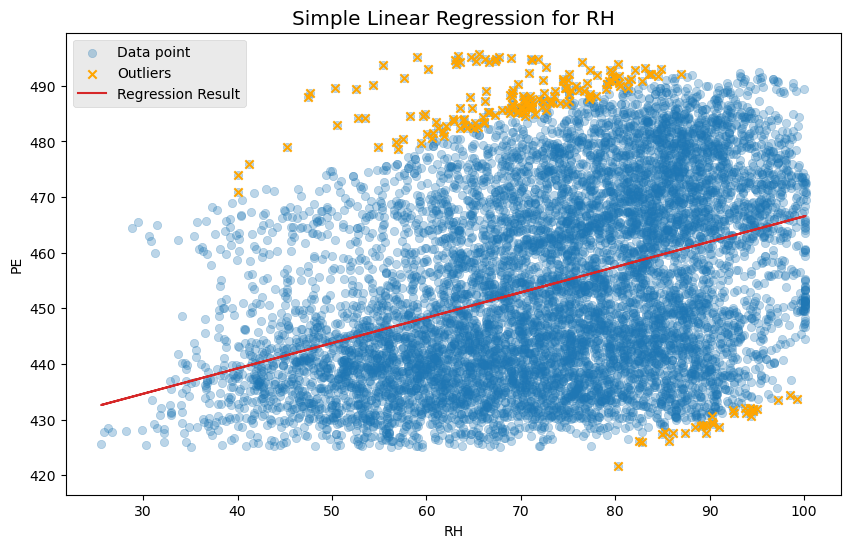

In [6]:
predictors = ['AT', 'V', 'AP', 'RH']
response = 'PE'

for col_name in predictors:
    x = df[col_name]
    y = df[response]

    x_constant = sm.add_constant(x)

    model = sm.OLS(y, x_constant).fit()

    residuals = y - model.predict(x_constant)

    residual_std = np.std(residuals)
    outliers_idx = np.where(abs(residuals) > 2 * residual_std)

    print(f"Simple Linear Regression Model for {col_name}:")
    print(model.summary())
    print("\n")

    fig, axes = plt.subplots(figsize=(10, 6))
    with plt.style.context('ggplot'):
        axes.scatter(x, y, alpha=0.3, label="Data point")
        
        if len(outliers_idx[0]) > 0:
            axes.scatter(x.iloc[outliers_idx], y.iloc[outliers_idx], marker="x", color="orange", label="Outliers")
        
        axes.plot(x, model.predict(x_constant), "tab:red", label="Regression Result")
        axes.set_title(f"Simple Linear Regression for {col_name}")
        axes.set_xlabel(col_name)
        axes.set_ylabel("PE") 
        axes.legend()
        plt.show()

#### Observations: 
##### The regression results indicate that Temperature (AT) and Exhaust Vacuum (V) have strong and statistically significant associations with PE, with R-squared values of 0.899 and 0.757, respectively. Ambient Pressure (AP) and Relative Humidity (RH) also show statistically significant associations (p < 0.001), but their R-squared values are much lower (0.269 and 0.152), indicating weaker relationships. 
##### The scatterplots confirm these findings, with AT and V showing clear linear trends, while AP and RH exhibit weaker patterns. Outliers are visible in all cases but have a more pronounced effect on AP and RH due to their weaker associations. Further investigation into outliers may improve model accuracy for these predictors. Overall, AT is the strongest predictor, followed by V, while AP and RH contribute less to explaining PE variability.

## (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [7]:
X = sm.add_constant(df[predictors])
y = df[response]

model = sm.OLS(y, X).fit()

print(model.summary())
p_values = model.pvalues[1:]  # Exclude the constant term
significant_predictors = p_values[p_values < 0.05].index.tolist()

print("\nStatistically significant predictors (p < 0.05):")
for predictor in significant_predictors:
    print(f"- {predictor}")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:41:31   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

#### Observation: From the result above we can reject the null hypothesis for all variables, as all predictors have their p-value less than 0.05

## (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coeﬃcients from 1c on the x-axis, and the multiple regression coeﬃcients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coeﬃcient in a simple linear regression model is shown on the x-axis, and its coeﬃcient estimate in the multiple linear regression model is shown on the y-axis.

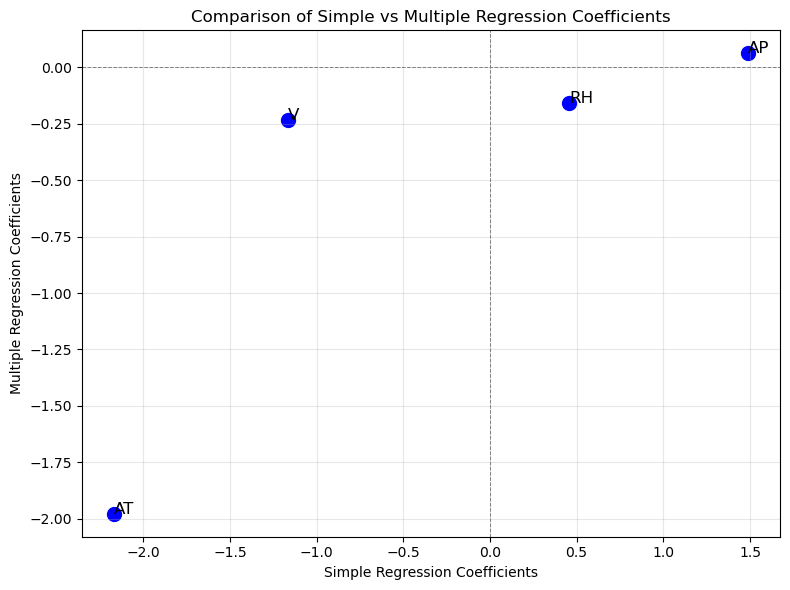

In [8]:
simple_coefficients = []

for predictor in predictors:
    X_simple = sm.add_constant(df[predictor])  
    y = df[response]
    simple_model = sm.OLS(y, X_simple).fit()
    simple_coefficients.append(simple_model.params[predictor]) 

X_multiple = sm.add_constant(df[predictors])  
y = df[response]
multiple_model = sm.OLS(y, X_multiple).fit()
multiple_coefficients = multiple_model.params[predictors].tolist()  

plt.figure(figsize=(8, 6))
plt.scatter(simple_coefficients, multiple_coefficients, color='blue', s=100)

for i, predictor in enumerate(predictors):
    plt.text(simple_coefficients[i], multiple_coefficients[i], predictor, fontsize=12)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.7) 
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7) 
plt.title('Comparison of Simple vs Multiple Regression Coefficients')
plt.xlabel('Simple Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients')
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

#### Observations:
##### The comparison shows that Temperature (AT) retains a strong and consistent relationship with the response in both simple and multiple regression models. However, Exhaust Vacuum (V), Ambient Pressure (AP), and Relative Humidity (RH) have reduced coefficients in the multiple regression model, indicating shared variance or multicollinearity. AT remains the most significant predictor.

## (f)Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form Y =β0 +β1X+β2X^2 +β3X^3 +ε

Polynomial Regression Model for AT:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:41:31   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492

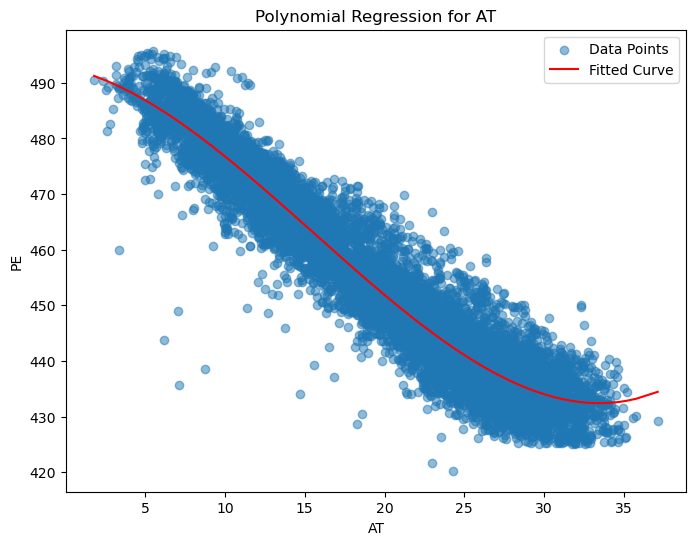

Polynomial Regression Model for V:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:41:31   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.

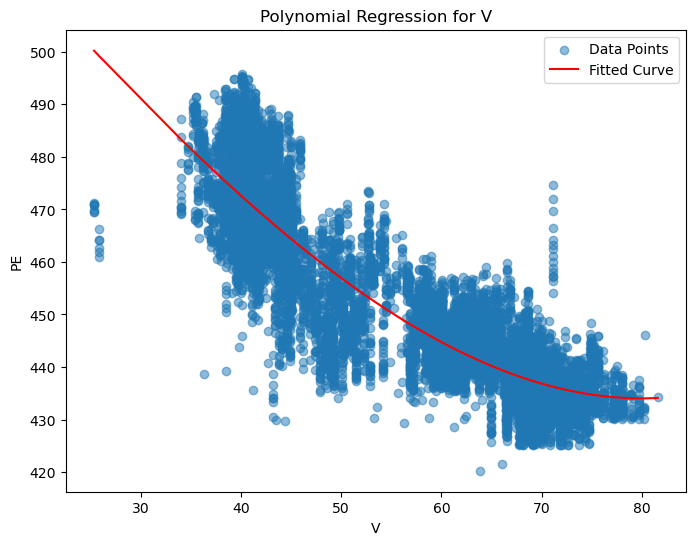

Polynomial Regression Model for AP:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:41:31   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0

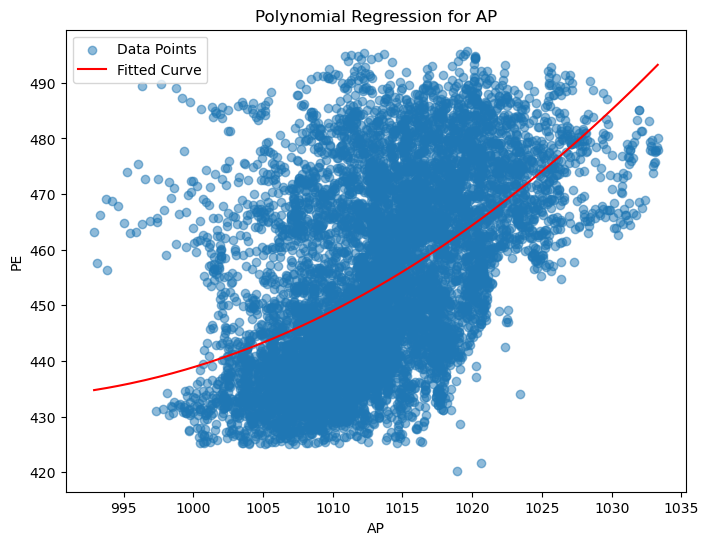

Polynomial Regression Model for RH:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:41:31   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468

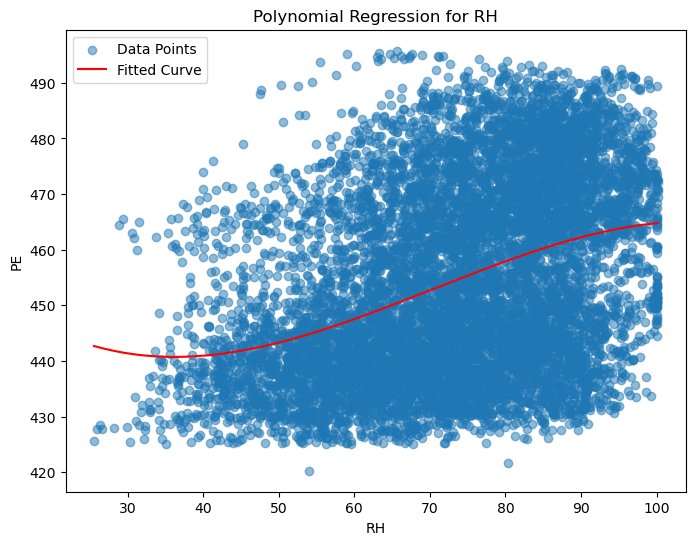

In [9]:
for predictor in predictors:
    X = df[predictor]
    X_poly = pd.DataFrame({
        'X': X,
        'X^2': X**2,
        'X^3': X**3
    })
    X_poly = sm.add_constant(X_poly) 
    y = df[response]

    poly_model = sm.OLS(y, X_poly).fit()

    print(f"Polynomial Regression Model for {predictor}:")
    print(poly_model.summary())
    print("\n")

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, alpha=0.5, label='Data Points')
    
    X_sorted = np.sort(X)
    y_pred = poly_model.predict(sm.add_constant(pd.DataFrame({
        'X': X_sorted,
        'X^2': X_sorted**2,
        'X^3': X_sorted**3
    })))
    
    plt.plot(X_sorted, y_pred, color='red', label='Fitted Curve')
    
    plt.title(f'Polynomial Regression for {predictor}')
    plt.xlabel(predictor)
    plt.ylabel(response)
    plt.legend()
    plt.show()

#### Observation:
##### The polynomial regression results indicate strong evidence of nonlinear associations for Temperature (AT) and Exhaust Vacuum (V), with high R-squared values of 0.912 and 0.775, respectively. Both quadratic and cubic terms are significant for AT, while only the cubic term is significant for V. Ambient Pressure (AP) and Relative Humidity (RH) show weaker nonlinear associations, with R-squared values of 0.275 and 0.154, respectively, though their quadratic and cubic terms are statistically significant. This suggests that AT and V exhibit the most pronounced nonlinear relationships with PE, while AP and RH contribute less to explaining the variability in PE.

## (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [10]:
interaction_terms = []
for pair in itertools.combinations(predictors, 2):  # Generate all 2-way combinations
    interaction_name = f"{pair[0]}*{pair[1]}"
    df[interaction_name] = df[pair[0]] * df[pair[1]]
    interaction_terms.append(interaction_name)

all_predictors = predictors + interaction_terms

X = sm.add_constant(df[all_predictors])  # Add constant for intercept
y = df[response]
model_with_interactions = sm.OLS(y, X).fit()

print(model_with_interactions.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:41:32   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

#### Observation:
##### Based on the regression results provided, there is evidence of association between some interaction terms and the response variable (PE). The following interaction terms are statistically significant (p < 0.05):
- AT * V: Coefficient = 0.0210, p-value < 0.001.
- AT * RH: Coefficient = 0.0052, p-value < 0.001.
- V * AP: Coefficient = 0.0068, p-value < 0.001.
- AP * RH: Coefficient = -0.0016, p-value = 0.034.
##### These significant p-values indicate that these interaction terms have a meaningful association with the response variable and contribute to explaining the variability in PE.

## (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [11]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

X_train_baseline = sm.add_constant(train_df[predictors])
y_train_baseline = train_df[response]
X_test_baseline = sm.add_constant(test_df[predictors])
y_test_baseline = test_df[response]

baseline_model = sm.OLS(y_train_baseline, X_train_baseline).fit()

train_mse_baseline = mean_squared_error(y_train_baseline, baseline_model.predict(X_train_baseline))
test_mse_baseline = mean_squared_error(y_test_baseline, baseline_model.predict(X_test_baseline))

print("Baseline Model:")
print(f"Train MSE: {train_mse_baseline:.4f}")
print(f"Test MSE: {test_mse_baseline:.4f}")
print("\n")

def create_enhanced_features(df):
    for feature in predictors:
        df[f'{feature}^2'] = df[feature]**2  
    
    for pair in combinations(predictors, 2):
        df[f'{pair[0]}*{pair[1]}'] = df[pair[0]] * df[pair[1]]
    return df

train_df_enhanced = create_enhanced_features(train_df.copy())  
test_df_enhanced = create_enhanced_features(test_df.copy())  

enhanced_features = [col for col in train_df_enhanced.columns if col not in [response] + predictors]

X_train_enhanced = sm.add_constant(train_df_enhanced[predictors + enhanced_features])
y_train_enhanced = train_df_enhanced[response]
X_test_enhanced = sm.add_constant(test_df_enhanced[predictors + enhanced_features])
y_test_enhanced = test_df_enhanced[response]

enhanced_model = sm.OLS(y_train_enhanced, X_train_enhanced).fit()

def backward_elimination(X, y, model, significance_level=0.05):
    features = X.columns.tolist()
    while True:
        model = sm.OLS(y, X[features]).fit()
        p_values = model.pvalues[1:]  
        max_p_value = p_values.max()
        if max_p_value >= significance_level:
            remove_feature = p_values.idxmax()
            
            base_features = set(predictors)
            split_term = remove_feature.split("*")
            
            if (len(split_term) > 1 and (split_term[0] in features and split_term[1] in features)):
                features.remove(remove_feature)
                print(f"Removed feature {remove_feature}")
            else:
                if remove_feature not in base_features:
                    features.remove(remove_feature)
                    print(f"Removed feature {remove_feature}")
                else:
                    break
        else:
            break

    return features, model

selected_features, final_model = backward_elimination(X_train_enhanced, y_train_enhanced, enhanced_model)

X_train_selected = sm.add_constant(X_train_enhanced[selected_features])
X_test_selected = sm.add_constant(X_test_enhanced[selected_features])

train_mse_enhanced = mean_squared_error(y_train_enhanced, final_model.predict(X_train_selected))
test_mse_enhanced = mean_squared_error(y_test_enhanced, final_model.predict(X_test_selected))

print("\nEnhanced Model with Feature Selection:")
print(f"Train MSE: {train_mse_enhanced:.4f}")
print(f"Test MSE: {test_mse_enhanced:.4f}")

print("\nFinal Model Summary:")
print(final_model.summary())

Baseline Model:
Train MSE: 20.5808
Test MSE: 21.2399


Removed feature V*RH
Removed feature V^2
Removed feature V*AP

Enhanced Model with Feature Selection:
Train MSE: 17.8908
Test MSE: 18.6600

Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     9258.
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:41:32   Log-Likelihood:                -19161.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6685   BIC:                         3.843e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                    

## (i) KNN Regression:
## i. Perform k-nearest neighbor regression for this dataset using both normalizedand raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

Best k for raw features: 5
Best k for normalized features: 4


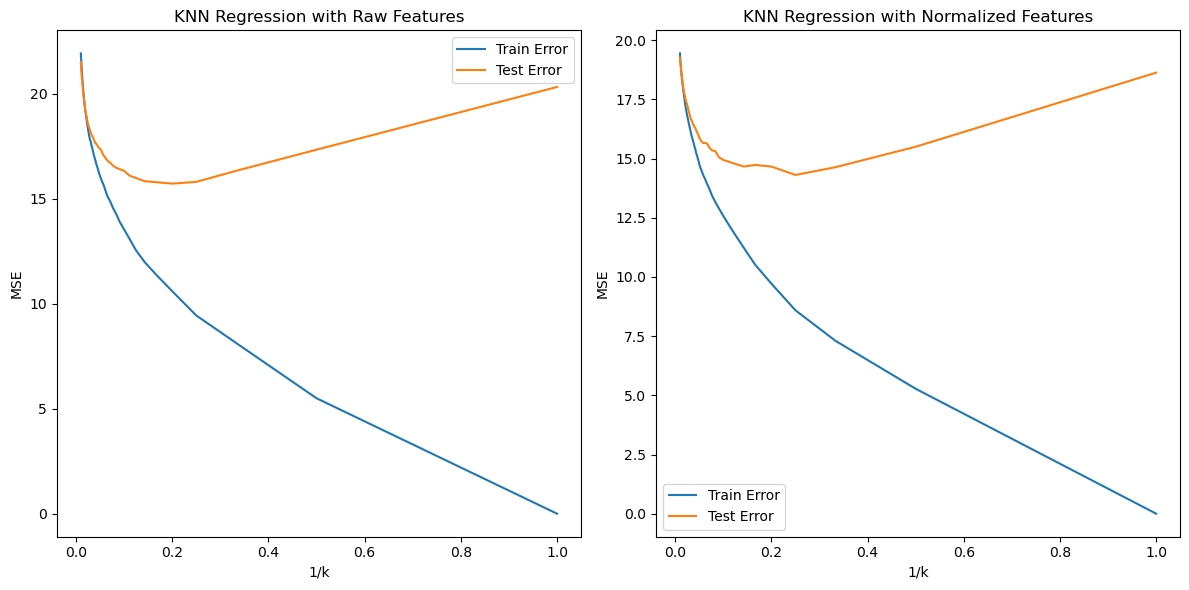

In [12]:
# Split the data into training and testing sets
X = df[predictors]
y = df[response]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- KNN Regression with Raw Features ---
k_values = range(1, 101)  # k from 1 to 100
train_errors_raw = []
test_errors_raw = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Make predictions
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate MSE
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    train_errors_raw.append(train_error)
    test_errors_raw.append(test_error)

# Find optimal k for raw features
best_k_raw = k_values[np.argmin(test_errors_raw)]
print(f"Best k for raw features: {best_k_raw}")

# --- KNN Regression with Normalized Features ---
# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_errors_scaled = []
test_errors_scaled = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)

    # Calculate MSE
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    train_errors_scaled.append(train_error)
    test_errors_scaled.append(test_error)

# Find optimal k for normalized features
best_k_scaled = k_values[np.argmin(test_errors_scaled)]
print(f"Best k for normalized features: {best_k_scaled}")

# --- Plotting ---
plt.figure(figsize=(12, 6))

# Plot raw features
plt.subplot(1, 2, 1)
plt.plot([1/k for k in k_values], train_errors_raw, label='Train Error')
plt.plot([1/k for k in k_values], test_errors_raw, label='Test Error')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.title('KNN Regression with Raw Features')
plt.legend()

# Plot normalized features
plt.subplot(1, 2, 2)
plt.plot([1/k for k in k_values], train_errors_scaled, label='Train Error')
plt.plot([1/k for k in k_values], test_errors_scaled, label='Test Error')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.title('KNN Regression with Normalized Features')
plt.legend()

plt.tight_layout()
plt.show()

### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [13]:
test_errors_knn = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    test_errors_knn.append(mean_squared_error(y_test, y_pred_knn))

best_k = k_values[np.argmin(test_errors_knn)]
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)
knn_mse = mean_squared_error(y_test, y_pred_knn)

# Linear Regression
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
linear_model = sm.OLS(y_train, X_train_sm).fit()
y_pred_linear = linear_model.predict(X_test_sm)
linear_mse = mean_squared_error(y_test, y_pred_linear)

# Print results
print(f"KNN Regression (k={best_k}) Test MSE: {knn_mse:.4f}")
print(f"Linear Regression Test MSE: {linear_mse:.4f}")

KNN Regression (k=5) Test MSE: 15.7268
Linear Regression Test MSE: 21.2399


#### The KNN Regression model with k=5 has a lower test MSE (15.7268) compared to the Linear Regression model (21.2399). This indicates that KNN Regression is better at predicting the net hourly electrical energy output (PE) for this dataset.

#### The superior performance of KNN suggests that there may be non-linear relationships between the predictors and the response variable that Linear Regression fails to capture. KNN, being a non-parametric model, can better adapt to these non-linearities.

## 2. ISLR: 2.4.1

##### For each of parts (a) through (d), indicate whether we would generally expect the performance of a fexible statistical learning method to be better or worse than an infexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predictors p is small.
- Better. A flexible method would generally perform better in this scenario. With a large sample size and few predictors, a flexible method can extract more information from the data without a high risk of overfitting. The large sample size allows the flexible method to capture complex patterns and relationships while maintaining good generalization.

(b) The number of predictors p is extremely large, and the number of observations n is small.
- Worse. An inflexible method would generally perform better in this case. With many predictors and few observations, a flexible method is highly prone to overfitting. It may capture noise rather than true underlying patterns. An inflexible method is more likely to avoid overfitting and provide better generalization.

(c) The relationship between the predictors and response is highly non-linear. 
- Better. A flexible method would generally perform better for highly non-linear relationships. Flexible methods can adapt to and capture complex, non-linear patterns in the data. Inflexible methods, like linear regression, would struggle to accurately model such relationships.

(d) The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely high.
- Worse. An inflexible method would generally perform better when the variance of error terms is extremely high. Flexible methods are more likely to overfit by attempting to model the noise in the data. Inflexible methods are more robust to high variance in error terms and less likely to fit to the noise, resulting in better generalization.

## 2. ISLR: 2.4.7

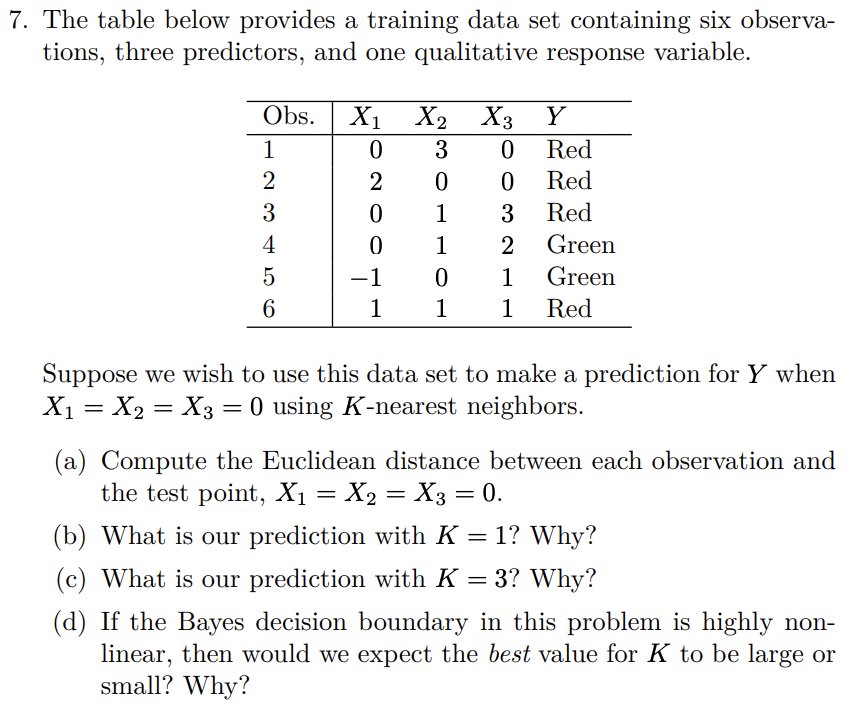

In [14]:
# Define the observations
observations = np.array([
    [0, 3, 0],
    [2, 0, 0],
    [0, 1, 3],
    [0, 1, 2],
    [-1, 0, 1],
    [1, 1, 1]
])

# Define the test point
test_point = np.array([0, 0, 0])

# Compute Euclidean distances
distances = np.sqrt(np.sum((observations - test_point)**2, axis=1))
print('(a)\n')
# Print the results
for i, distance in enumerate(distances, 1):
    print(f"Observation {i}: Distance = {distance:.2f}")


(a)

Observation 1: Distance = 3.00
Observation 2: Distance = 2.00
Observation 3: Distance = 3.16
Observation 4: Distance = 2.24
Observation 5: Distance = 1.41
Observation 6: Distance = 1.73


(b) With K = 1, we choose the class of the nearest neighbor. The nearest neighbor to the test point (0, 0, 0) is Observation 5, which has a distance of approximately 1.41 and a class of "Green". Because Observation 5 is the closest data point to the test point.

(c) With K = 3, we consider the three nearest neighbors and predict the class that appears most frequently among them. The three nearest neighbors are:
- Observation 5: Distance ≈ 1.41, Class: Green
- Observation 6: Distance ≈ 1.73, Class: Red
- Observation 2: Distance = 2, Class: Red

Out of these three, "Red" appears twice, and "Green" appears once.
Prediction: Red, because the majority class among the 3 nearest neighbors is "Red".

(d) If the Bayes decision boundary is highly nonlinear, we would expect the best value for K to be small. A smaller K considers fewer neighbors and is more flexible, allowing the model to capture complex and nonlinear decision boundaries. Larger values of K may lead to oversmoothing and may not capture intricate patterns in the data.